In [3]:
import numpy as np
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import sounddevice as sd
from scipy.io.wavfile import write

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return


[-5512.36501543 -5498.32661981 -4581.10644498 -4507.67483716
 -4494.04139527 -4479.05810764 -4465.55965033 -4451.11630099
 -4436.40298252 -4421.95963318 -4374.0401097  -4359.05682208
 -3460.19454919 -3446.5611073  -3432.38772712 -3418.61930065
 -3404.17595132 -2407.17989373 -2387.20217689 -2371.5439664
 -2357.64055537 -1343.09650326 -1326.35841618 -1312.05005142
  -297.77596846  -278.60815907   278.60815907   297.77596846
  1312.05005142  1326.35841618  1343.09650326  2357.64055537
  2371.5439664   2387.20217689  2407.17989373  3404.17595132
  3418.61930065  3432.38772712  3446.5611073   3460.19454919
  4359.05682208  4374.0401097   4421.95963318  4436.40298252
  4451.11630099  4465.55965033  4479.05810764  4494.04139527
  4507.67483716  4581.10644498  5487.39286939  5505.75077134]


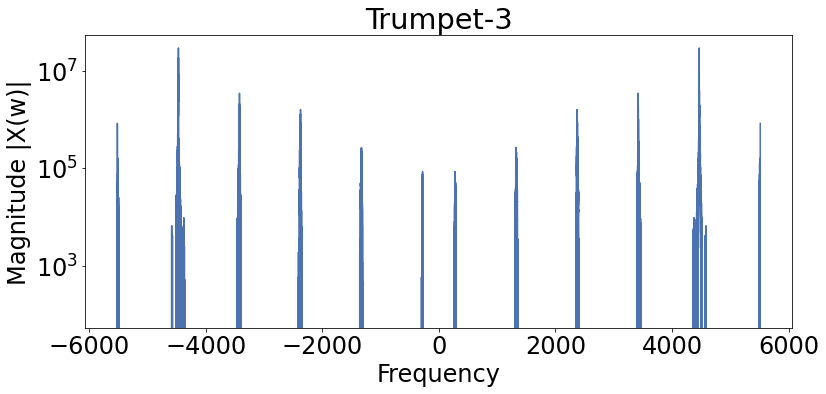

In [32]:
#Problem 1 
    
def magnitude_spectra(Fs,x,distance,height,title):
    y=abs(fft(x))
    y=y-y.mean()
    y=y
    a=x.size
    xaxis=np.arange(0,a)
    xaxis=(xaxis-a/2)*Fs/a
    #X_db = 20*np.log10((y))
    #plt.subplot(211)
    plt.semilogy(xaxis,(y));plt.ylabel('Magnitude |X(w)|'); plt.xlabel('Frequency'); plt.title(title);
    X_peaks=sp.find_peaks(y,distance=distance,height=height)
    A1=xaxis[X_peaks[0]]
    print(A1)
    #plt.subplot(2,1,2)
    A2=y[X_peaks[0]]
    #plt.stem(A1,A2,"x")
    plt.tight_layout()
    
    
Fs3,x3 = wavfile.read('trumpet3.wav')
#print(Fs3)
x3=x3-x3.mean()
#plt.subplot(4,1,3)
magnitude_spectra(Fs3,x3,100,10,'Trumpet-3')

FF3=278.6081 #1326.3584

[-5511.49772727 -5438.33181818 -5383.20681818 -5271.95454545
 -5167.71818182 -4959.24545455 -4817.925      -4724.71363636
 -4626.49090909 -4574.37272727 -4521.25227273 -4464.12272727
 -4412.00454545 -4359.88636364 -3405.72272727 -2334.29318182
 -1234.8          -99.225         99.225       1234.8
  2334.29318182  3405.72272727  4359.88636364  4412.00454545
  4464.12272727  4521.25227273  4574.37272727  4626.49090909
  4724.71363636  4817.925       4959.24545455  5167.71818182
  5271.95454545  5383.20681818  5438.33181818  5508.49090909]


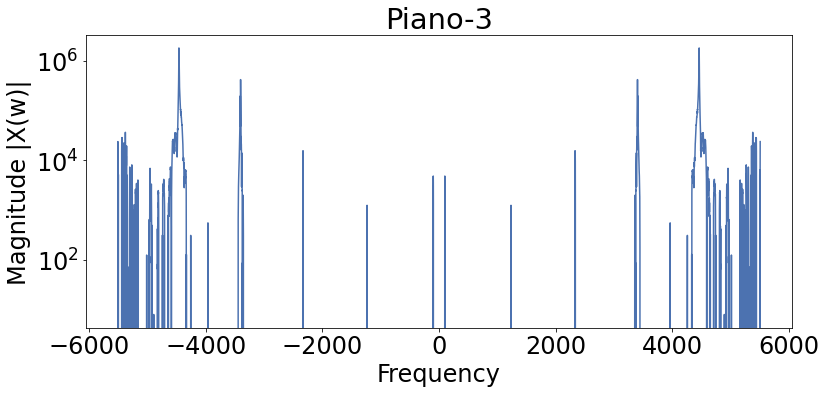

In [33]:
Fs1,x1 = wavfile.read('piano3.wav')
#print(x1.size())
#plt.subplot(4,1,1)
x1=x1-x1.mean()
magnitude_spectra(Fs1,x1,50,1234,'Piano-3')

FF1= 1234.8

[-5512.21363636 -5251.05       -4989.6        -4728.15
 -4472.71363636 -4230.16363636 -4198.37727273 -3962.41363636
 -3930.91363636 -3706.97727273 -3675.47727273 -3451.82727273
 -3421.47272727 -3392.26363636 -3177.20454545 -3145.70454545
 -2917.18636364 -2884.25454545 -2653.73181818 -2621.94545455
 -2398.29545455 -2366.50909091 -2335.86818182 -2137.70454545
 -2092.74545455 -1882.26818182 -1851.91363636 -1821.55909091
 -1613.94545455 -1558.96363636 -1358.50909091 -1326.72272727
 -1297.51363636 -1103.35909091 -1053.24545455  -778.90909091
  -508.86818182  -243.40909091   243.40909091   508.86818182
   778.90909091  1053.24545455  1103.35909091  1297.51363636
  1326.72272727  1358.50909091  1558.96363636  1613.94545455
  1821.55909091  1851.91363636  1882.26818182  2092.74545455
  2137.70454545  2335.86818182  2366.50909091  2398.29545455
  2621.94545455  2653.73181818  2884.25454545  2917.18636364
  3145.70454545  3177.20454545  3392.26363636  3421.47272727
  3451.82727273  3675.47727273

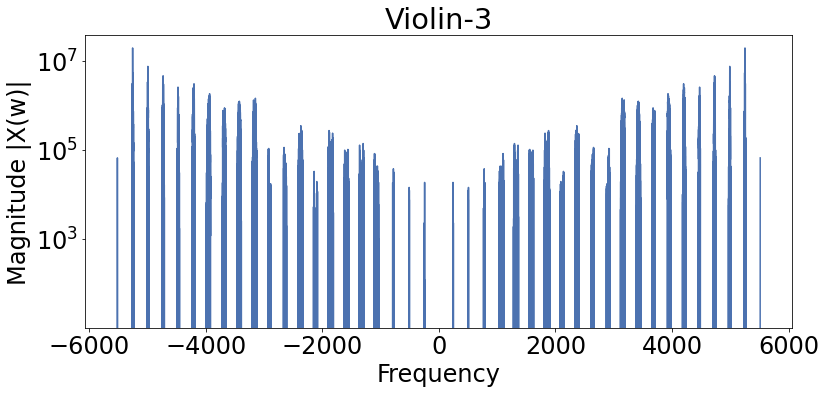

In [34]:
Fs2,x2 = wavfile.read('violin3.wav')
x2=x2-x2.mean()
#print(Fs2)
magnitude_spectra(Fs2,x2,100,1000,'Violin-3')

FF2=508.8681

[-5512.20402685 -5136.91006711 -5120.92751678 -5100.20939597
 -4750.36912752 -4735.5704698  -4718.99597315 -4703.60536913
 -4687.03087248 -4337.19060403 -3992.9738255  -3970.18389262
 -3953.60939597 -3937.33087248 -3922.23624161 -3907.14161074
 -3601.40134228 -3580.38724832 -3560.55704698 -3181.11946309
 -3165.72885906 -3141.4590604  -3123.9966443  -3108.01409396
 -3093.21543624 -2407.74161074 -2388.79932886 -2323.6852349
 -1528.70134228  1528.70134228  2323.6852349   2388.79932886
  2407.74161074  3093.21543624  3108.01409396  3123.9966443
  3141.4590604   3165.72885906  3181.11946309  3560.55704698
  3580.38724832  3601.40134228  3907.14161074  3922.23624161
  3937.33087248  3953.60939597  3970.18389262  3992.9738255
  4337.19060403  4687.03087248  4703.60536913  4718.99597315
  4735.5704698   4750.36912752  5100.20939597  5120.92751678
  5136.91006711]


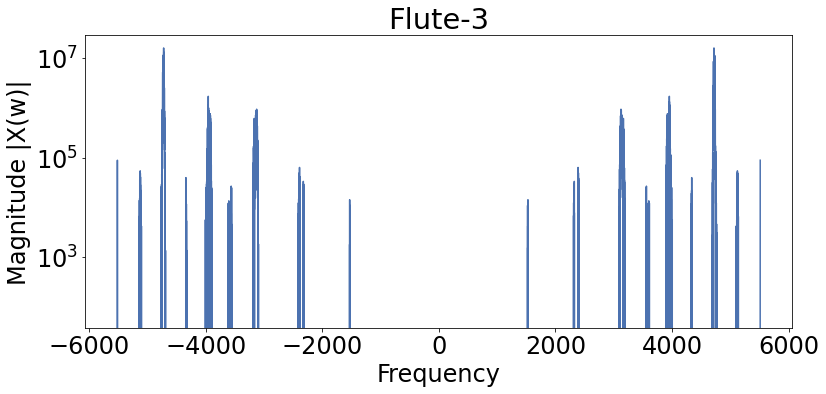

In [40]:
Fs4,x4 = wavfile.read('flute3.wav')
#print(Fs4)
x4=x4-x4.mean()
#plt.subplot(4,1,4)
magnitude_spectra(Fs4,x4,50,100,'Flute-3')

FF4= 1528.7013

[-5512.2 -5001.6 -4986.6 -4968.3 -4483.5 -4467.3 -4449.3 -4434.3 -4416.
 -3941.1 -3920.7 -3468.  -3449.7 -3431.1 -3412.8 -3395.7 -3380.4 -3364.5
 -2896.2 -2399.7 -2383.5 -2367.9 -2350.8 -2333.7 -2318.1 -2297.4  2297.4
  2318.1  2333.7  2350.8  2367.9  2383.5  2399.7  2896.2  3364.5  3380.4
  3395.7  3412.8  3431.1  3449.7  3468.   3920.7  3941.1  4416.   4434.3
  4449.3  4467.3  4483.5  4968.3  4986.6  5001.6]


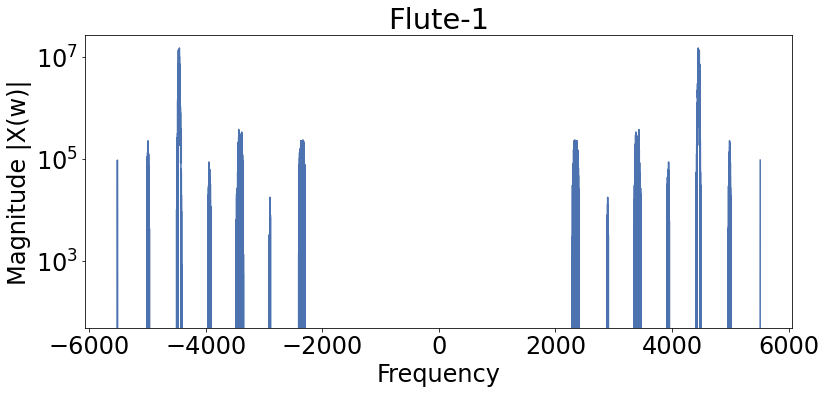

In [36]:
Fsf1,xf1 = wavfile.read('flute1.wav')
#print(Fs4)
xf1=xf1-xf1.mean()
#plt.subplot(4,1,4)
magnitude_spectra(Fsf1,xf1,50,100,'Flute-1')

#flute1 = 2297.4

[-5512.19586207 -5446.50206897 -5250.02896552 -4988.1662069
 -4725.69517241 -4463.83241379 -4195.88689655 -4153.91586207
 -3927.94137931 -3888.09931034 -3696.79655172 -3665.47034483
 -3408.77793103 -3352.20827586 -3140.83241379 -2885.05241379
 -2617.71517241 -2346.12       -2083.64896552  2083.64896552
  2346.12        2617.71517241  2885.05241379  3140.83241379
  3352.20827586  3408.77793103  3665.47034483  3696.79655172
  3888.09931034  3927.94137931  4153.91586207  4195.88689655
  4463.83241379  4725.69517241  4988.1662069   5250.02896552
  5446.50206897]


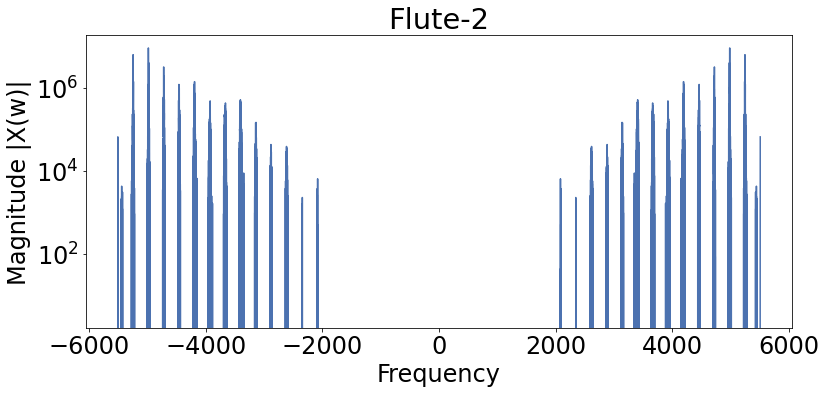

In [37]:
Fsf2,xf2 = wavfile.read('flute2.wav')
#print(Fs4)
xf2=xf2-xf2.mean()
#plt.subplot(4,1,4)
magnitude_spectra(Fsf2,xf2,100,8,'Flute-2')

#flute2= 2083.64896

37250
[-5512.20402685 -5136.91006711 -5120.92751678 -5100.20939597
 -4750.36912752 -4735.5704698  -4718.99597315 -4703.60536913
 -4687.03087248 -4337.19060403 -3992.9738255  -3970.18389262
 -3953.60939597 -3937.33087248 -3922.23624161 -3907.14161074
 -3601.40134228 -3580.38724832 -3560.55704698 -3181.11946309
 -3165.72885906 -3141.4590604  -3123.9966443  -3108.01409396
 -3093.21543624 -2407.74161074 -2388.79932886 -2323.6852349
 -1528.70134228  1528.70134228  2323.6852349   2388.79932886
  2407.74161074  3093.21543624  3108.01409396  3123.9966443
  3141.4590604   3165.72885906  3181.11946309  3560.55704698
  3580.38724832  3601.40134228  3907.14161074  3922.23624161
  3937.33087248  3953.60939597  3970.18389262  3992.9738255
  4337.19060403  4687.03087248  4703.60536913  4718.99597315
  4735.5704698   4750.36912752  5100.20939597  5120.92751678
  5136.91006711]


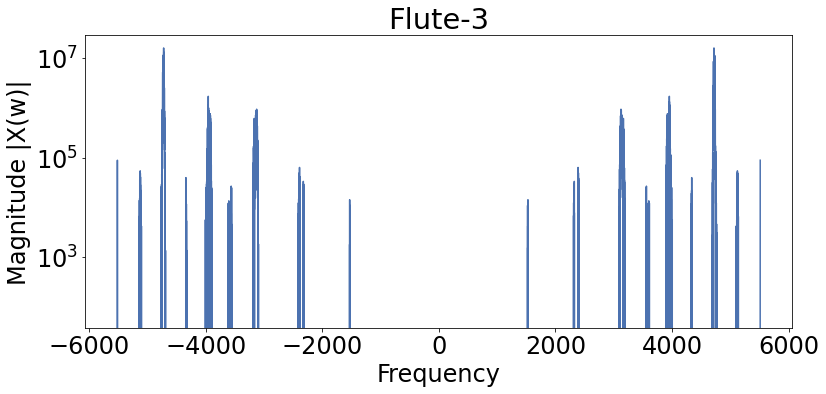

In [86]:
Fsf3,xf3 = wavfile.read('flute3.wav')
print(xf3.size)
xf3=xf3-xf3.mean()
#plt.subplot(4,1,4)
magnitude_spectra(Fsf3,xf3,50,100, 'Flute-3')

#flute3  = 1528.70

[-5512.2 -5025.6 -5022.6 -5018.1 -5013.9 -5008.8 -5005.8 -4999.5 -4994.4
 -4991.1 -4988.1 -4982.4 -4976.1 -4970.4 -4966.5 -4961.7 -4958.1 -4954.8
 -4951.5 -4943.4 -4486.5 -4480.8 -4475.1 -4469.4 -4465.8 -4462.8 -4457.1
 -4452.6 -4447.8 -4442.1 -4436.4 -4430.4 -4427.4 -4423.2 -4418.4 -4414.5
 -3966.3 -3960.3 -3956.7 -3952.2 -3948.9 -3945.3 -3941.4 -3938.1 -3934.8
 -3931.5 -3928.2 -3922.5 -3918.6 -3915.  -3912.  -3908.7 -3905.7 -3464.7
 -3459.6 -3456.6 -3450.3 -3444.  -3438.3 -3434.1 -3429.9 -3426.6 -3423.6
 -3419.7 -3415.8 -3412.2 -3407.7 -3404.7 -3399.  -3395.4 -3391.8 -3386.1
 -3382.5 -3377.1 -3371.4 -2921.4 -2917.2 -2913.9 -2908.2 -2902.5 -2899.2
 -2894.7 -2891.1 -2886.6 -2883.3 -2880.  -2874.3 -2871.  -2868.  -2862.
 -2858.7 -2853.3 -2847.6 -2394.3 -2388.6 -2382.9 -2379.9 -2374.2 -2370.3
 -2366.7 -2361.6 -2357.7 -2354.4 -2350.5 -2345.1 -2339.4 -2336.4 -2330.7
 -2326.2 -2321.1 -1838.1 -1297.2  1297.2  1838.1  2321.1  2326.2  2330.7
  2336.4  2339.4  2345.1  2350.5  2354.4  2357.7  23

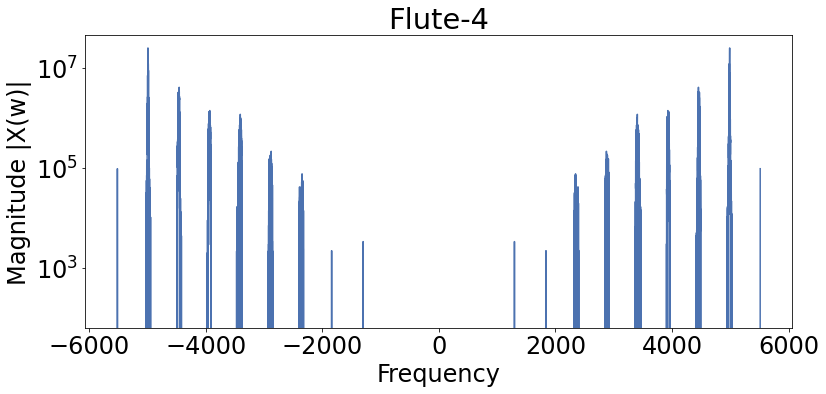

In [85]:
Fsf4,xf4 = wavfile.read('flute4.wav')
#print(Fs4)
xf4=xf4-xf4.mean()
#plt.subplot(4,1,4)
magnitude_spectra(Fsf4,xf4,10,100, 'Flute-4')
print(x4.size)
#flute4= 1297.2

ValueError: x and y must have same first dimension, but have shapes (156173,) and (0,)

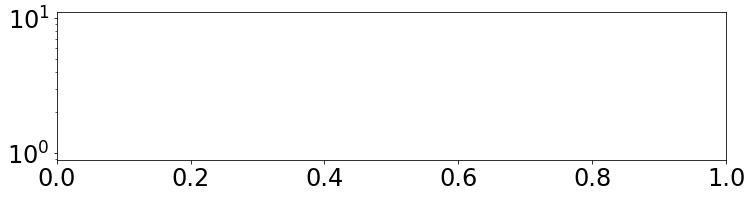

In [193]:
#Problem 2

import sounddevice as sd

def magnitude_spectra2(Fs,x,distance,height):
    y=abs(fft(x))
    y=y-y.mean()
    a=x.size
    xaxis=np.arange(0,a)
    xaxis=(xaxis-a/2)*Fs/a
    #X_db = 20*np.log10((y))
    plt.subplot(211)
    plt.semilogy(xaxis[156173: 312346],y[1][156173:312346])
    xaxis=xaxis[156173:312346]
    X_peaks=sp.find_peaks(y,distance=distance,height=height)
    A1=xaxis[X_peaks[0]]
    print(A1)
    plt.subplot(2,1,2)
    A2=y[X_peaks[0]]
    plt.stem(A1,A2,"x")
    plt.tight_layout()

Fswhistle, xwhistle = wavfile.read('whistle.wav')
xwhistle[1]= xwhistle[1]-xwhistle[1].mean()
#plt.plot(xwhistle)
#print(xwhistle(ndim))
magnitude_spectra2(Fswhistle,xwhistle,100,10)



fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 

def keylock():
    Fsample,sample

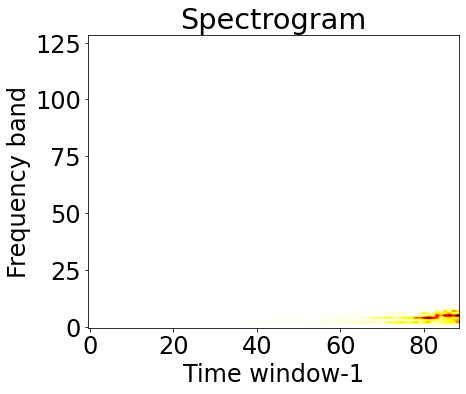

In [153]:
#Problem 3

def magnitude_spectra1(Fs,x,distance,height,b1,b2,l):
    
    y=abs(fft(x))
    a=x.size
    xaxis=np.arange(0,a)
    xaxis=((xaxis-a/2))*Fs/a
    
    plt.subplot(211)
    plt.plot(y)
    #plt.semilogy(xaxis,20*np.log10(y));plt.ylabel('Magnitude (dB)');plt.xlabel('Sample')
    xaxis1= np.arange(b1,b2)/44100
    plt.subplot(2,1,2)
    plt.plot(xaxis1,x[0:20000]); plt.ylabel('Value');plt.xlabel('Time (s)')
    X_peaks=sp.find_peaks(y,distance=distance,height=height)
    A1=xaxis[X_peaks[0]]
    print(A1)
    
    A2=y[X_peaks[0]]
    #plt.stem(A1,A2,"x")
    plt.tight_layout()

Fs31,x31 = wavfile.read('Opera.wav')
x311=x31[1:20000]
a31=x311.size

freqs, times, spectrogram = signal.spectrogram(x311)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-1')
plt.tight_layout()


#magnitude_spectra1(Fs31,x311,100,50,1,20000,0)


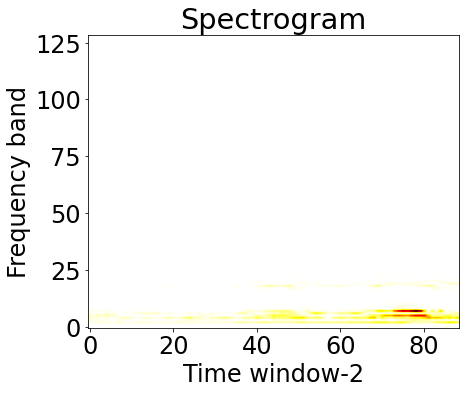

In [154]:
x312=x31[20001:40000]
a31=x312.size
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(x312)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-2')
plt.tight_layout()
#magnitude_spectra1(Fs31,x312,100,50,20001,40000,1)

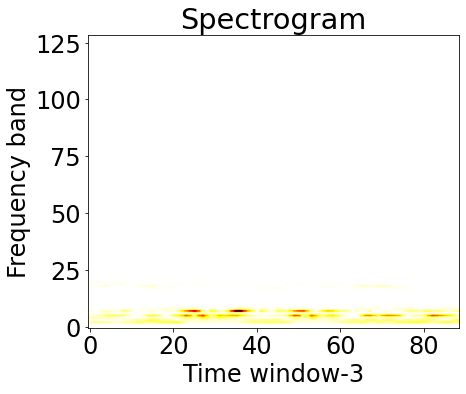

In [156]:
x313=x31[40001:60000]
a31=x313.size

freqs, times, spectrogram = signal.spectrogram(x313)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-3')
plt.tight_layout()
#magnitude_spectra1(Fs31,x313,100,50,40001,60000,2)

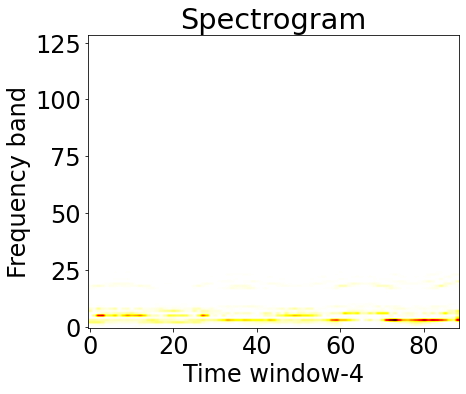

In [157]:
x314=x31[60001:80000]
freqs, times, spectrogram = signal.spectrogram(x314)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-4')
plt.tight_layout()
#magnitude_spectra1(Fs31,x314,1000,10,60001,80000,3)

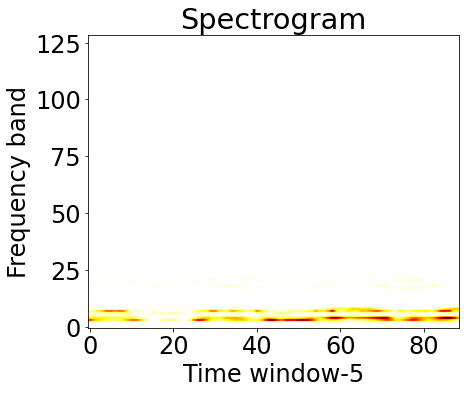

In [158]:
x315=x31[80001:100000]
a31=x312.size

freqs, times, spectrogram = signal.spectrogram(x315)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-5')
plt.tight_layout()
#magnitude_spectra1(Fs31,x315,1000,10,80001,100000,4)

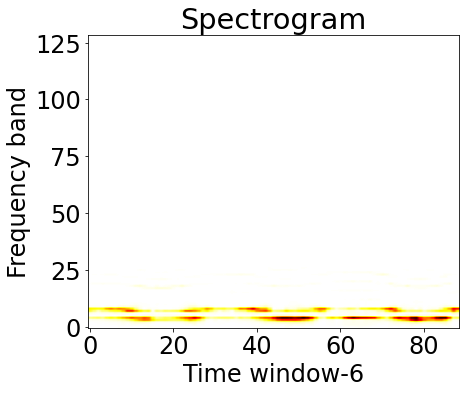

In [159]:
x316=x31[100001:120000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x316)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-6')
plt.tight_layout()
#magnitude_spectra1(Fs31,x316,1000,10,100001,120000,5)

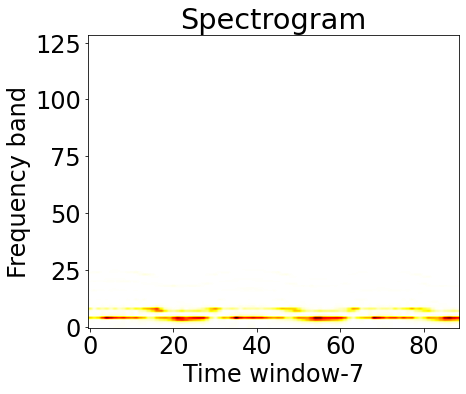

In [164]:
x317=x31[120001:140000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x317,fs=44100)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-7')
plt.tight_layout()
#magnitude_spectra1(Fs31,x317,1000,10,120001,140000,6)

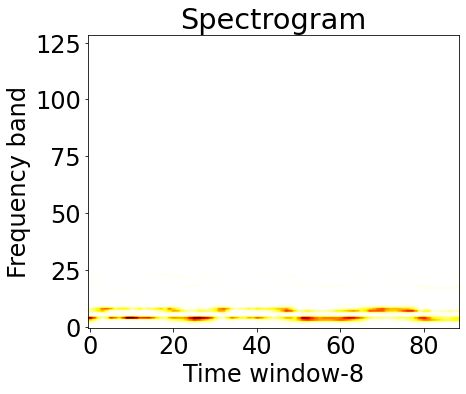

In [163]:
x318=x31[140001:160000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x318,fs=44100)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-8')
plt.tight_layout()
#magnitude_spectra1(Fs31,x318,1000,10,140001,160000,7)

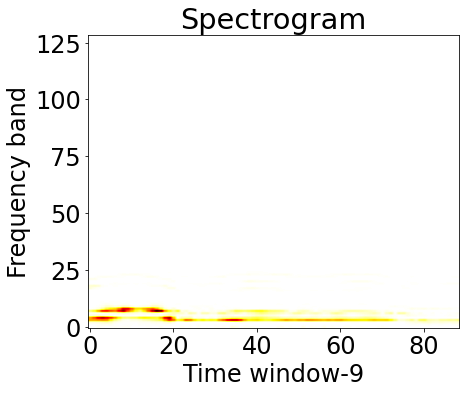

In [162]:
x319=x31[160001:180000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x319,fs=44100)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-9')
plt.tight_layout()
#magnitude_spectra1(Fs31,x319,1000,10,160001,180000,8)

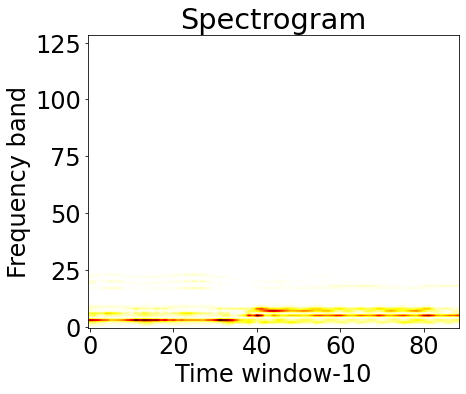

In [165]:
x3110=x31[180001:200000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x3110)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-10')
plt.tight_layout()
#magnitude_spectra1(Fs31,x3110,1000,10,180001,200000,9)

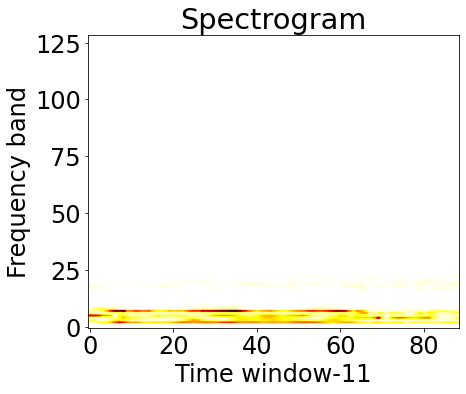

In [166]:
x3111=x31[200001:220000]
a31=x312.size
freqs, times, spectrogram = signal.spectrogram(x3111)

plt.figure(figsize=(7,6))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window-11')
plt.tight_layout()
#magnitude_spectra1(Fs31,x3111,1000,10,200001,220000,10)